<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-3-yiheng/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)
# X_train, y_train = X_train[:10000], y_train[:10000]
# X_test, y_test = X_test[:2000], y_test[:2000]

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import timeit,time
import matplotlib.pyplot as plt
import pandas as pd

Training accuracy 0.9437
Test accuracy 0.8778
Confusion matrix= 
 [[820   2  22  30   5   1 114   1   5   0]
 [  2 976   3  12   4   0   3   0   0   0]
 [ 23   2 806   8  90   0  69   0   2   0]
 [ 23  15  15 881  36   1  25   0   4   0]
 [  1   1  80  29 822   0  64   0   3   0]
 [  0   0   0   1   0 944   0  38   2  15]
 [112   5 101  27  57   1 684   0  13   0]
 [  0   0   0   0   0  13   0 973   1  13]
 [  6   0   8   6   8   2  12   7 950   1]
 [  0   0   0   1   0  16   2  58   1 922]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.89      0.88      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.94      0.95      1000
           6       0.70      0.68      0.69      1000
           7       0.90      0.97      0.94

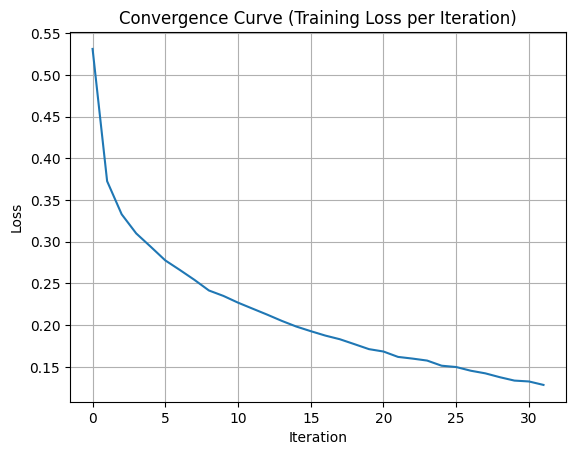

Training time: 62.37 seconds


In [20]:
# Start with a simple model architecture and train your model.
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=300,
    random_state=1
)

mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
print("Training accuracy", mlp.score(X_train,y_train))
print("Test accuracy", mlp.score(X_test,y_test))
print("Confusion matrix= \n", confusion_matrix(y_test,y_pred))
print("\n Classification report: \n",classification_report(y_test,y_pred))
print("Number of iterations until convergence:",mlp.n_iter_)
plt.plot(mlp.loss_curve_)
plt.title("Convergence Curve (Training Loss per Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

execution_time = timeit.timeit(
    'mlp.fit(X_train, y_train)',
    globals=globals(),
    number=5
)

avg_execution_time = execution_time / 5
print(f"Training time: {avg_execution_time:.2f} seconds")

     name  train_acc  test_acc  training time  number of iterations
0   (10,)   0.889033    0.8524      41.332508                    43
1   (50,)   0.943700    0.8778      63.490752                    32
2  (100,)   0.959883    0.8838      75.628120                    33
3  (200,)   0.954533    0.8875      90.990106                    25
4  (400,)   0.979783    0.8913     261.235032                    39
5  (700,)   0.975467    0.8911     410.217999                    36


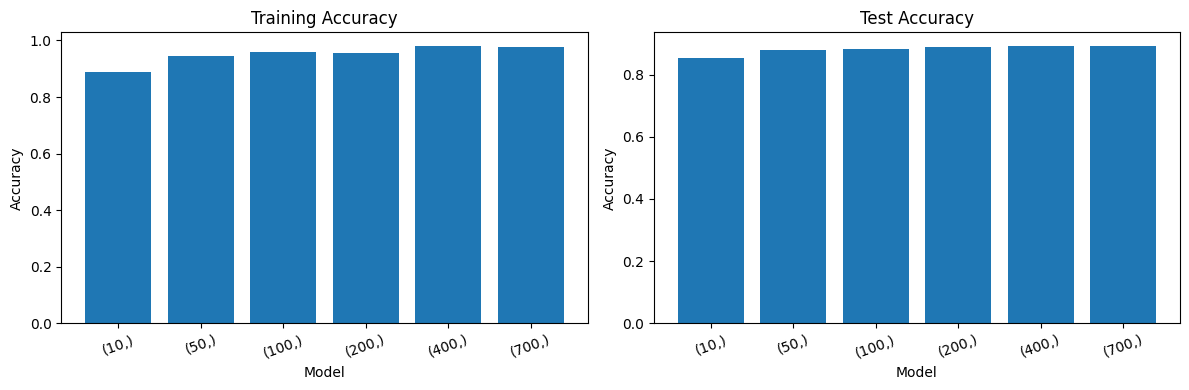

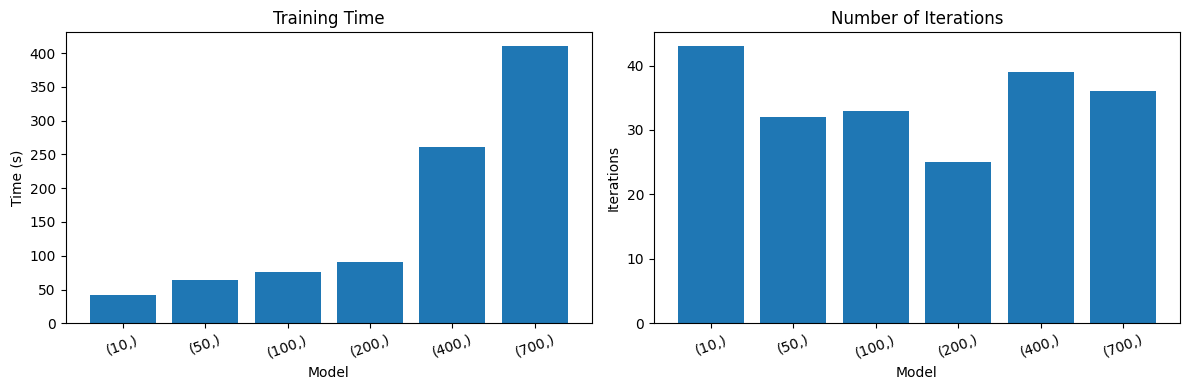

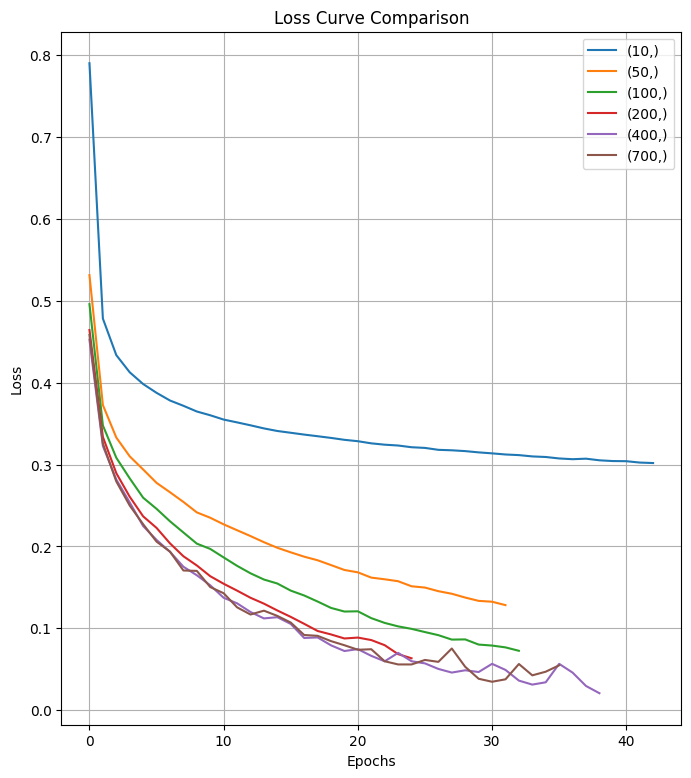

In [23]:
# the number of hidden neurons

configs_hidden_neurons = [
    ("(10,)", (10,)),
    ("(50,)", (50,)),
    ("(100,)", (100,)),
    ("(200,)", (200,)),
    ("(400,)", (400,)),
    ("(700,)", (700,))
]
results = []
loss_curves = {}

for (name,hidden_neurons) in configs_hidden_neurons:
  mlp = MLPClassifier(
    hidden_layer_sizes=hidden_neurons,
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_

df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(8, 9))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


                   name  train_acc  test_acc  training time  \
0              (100,50)   0.946350    0.8820      61.982987   
1             (100,100)   0.943333    0.8860      64.554820   
2          (100,100,50)   0.953633    0.8863      82.461333   
3         (100,100,100)   0.941000    0.8856      68.348015   
4      (200,100,100,50)   0.967650    0.8847     167.708830   
5  (400,200,200,100,50)   0.975433    0.8877     505.606987   

   number of iterations  
0                    23  
1                    22  
2                    26  
3                    21  
4                    31  
5                    44  


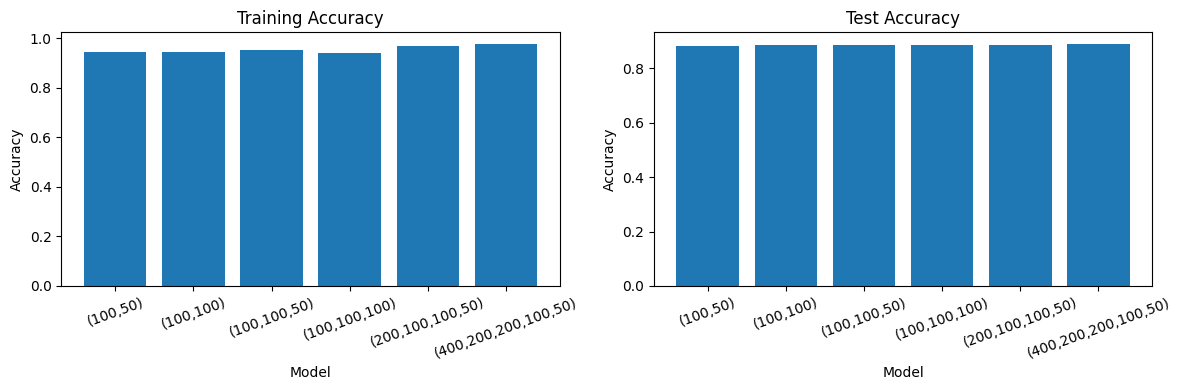

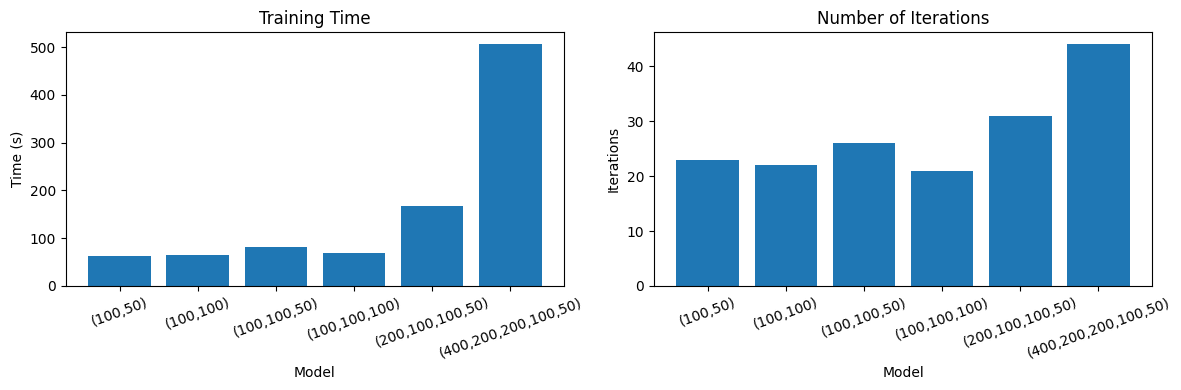

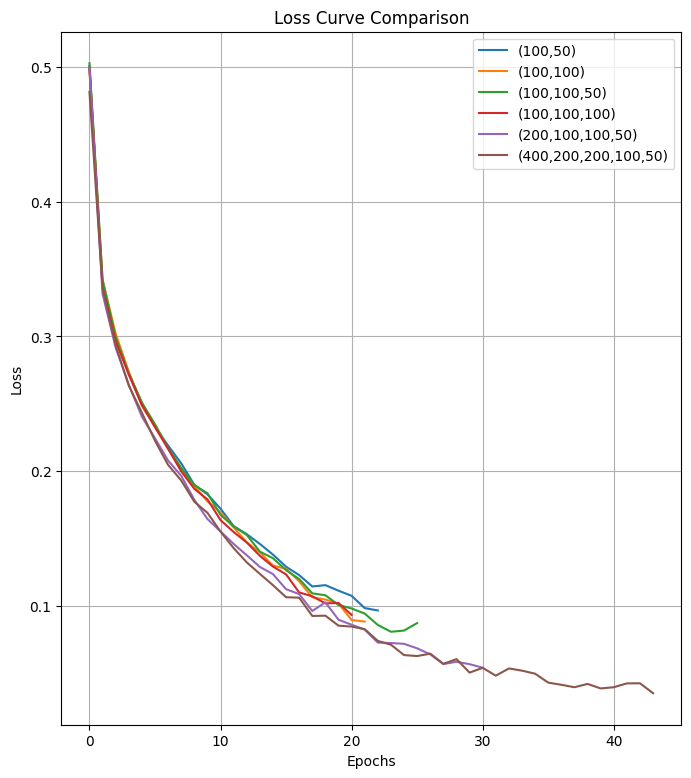

In [24]:
# the number of hidden layers and neurons

configs_hidden_layers = [
    ("(100,50)", (100,50)),
    ("(100,100)", (100,100)),
    ("(100,100,50)", (100,100,50)),
    ("(100,100,100)", (100,100,100)),
    ("(200,100,100,50)", (200,100,100,50)),
    ("(400,200,200,100,50)", (400,200,200,100,50))
]
results = []
loss_curves = {}

for (name,hidden_layers) in configs_hidden_layers:
  mlp = MLPClassifier(
    hidden_layer_sizes=hidden_layers,
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(8, 9))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


       name  train_acc  test_acc  training time  number of iterations
0      relu   0.946350    0.8820      58.638742                    23
1      tanh   0.952317    0.8788      82.203283                    25
2  logistic   0.948117    0.8748      92.754193                    33


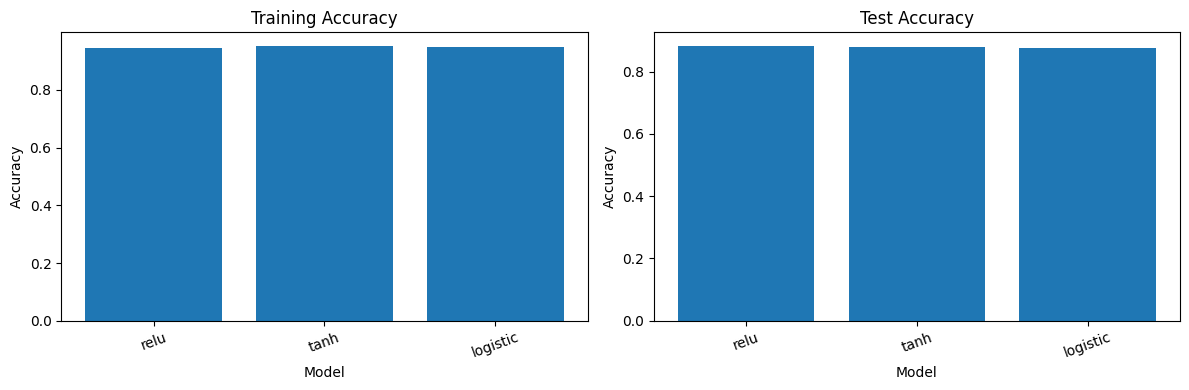

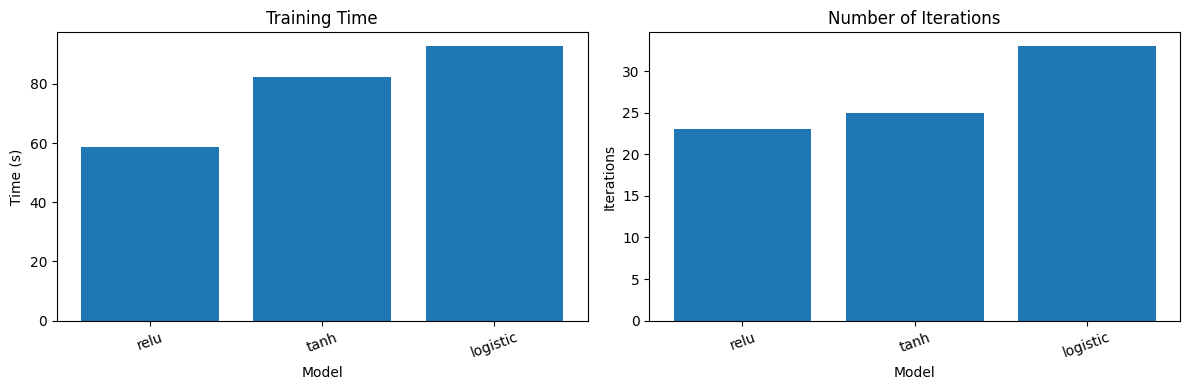

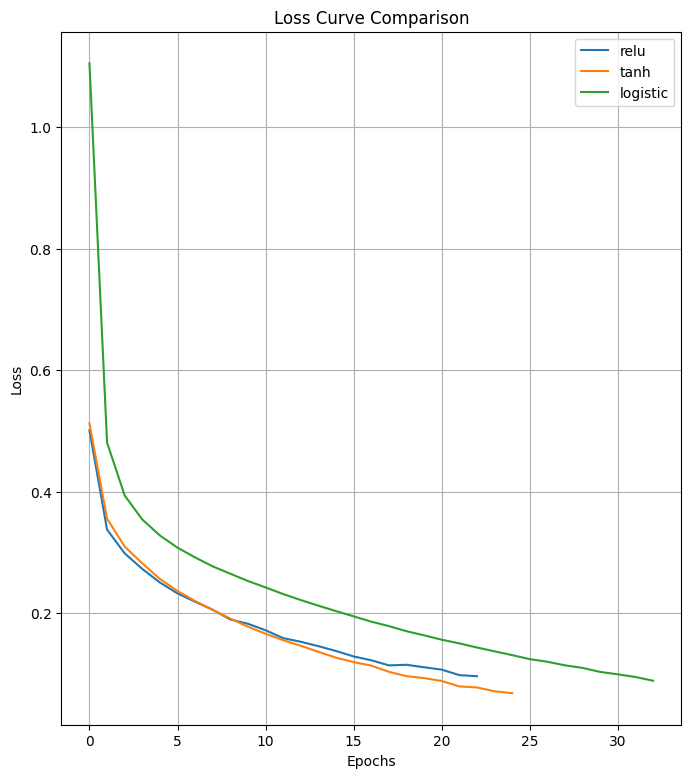

In [25]:
# the activation functions
configs_activations = [
    ("relu", 'relu'),
    ("tanh", 'tanh'),
    ("logistic", 'logistic')
]
results = []
loss_curves = {}

for (name,activation) in configs_activations:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation=activation,
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(8, 9))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


    name  train_acc  test_acc  training time  number of iterations
0   adam   0.946350    0.8820      57.873361                    23
1    sgd   0.922933    0.8792     164.514759                    72
2  lbfgs   0.996067    0.8781     472.911467                   300


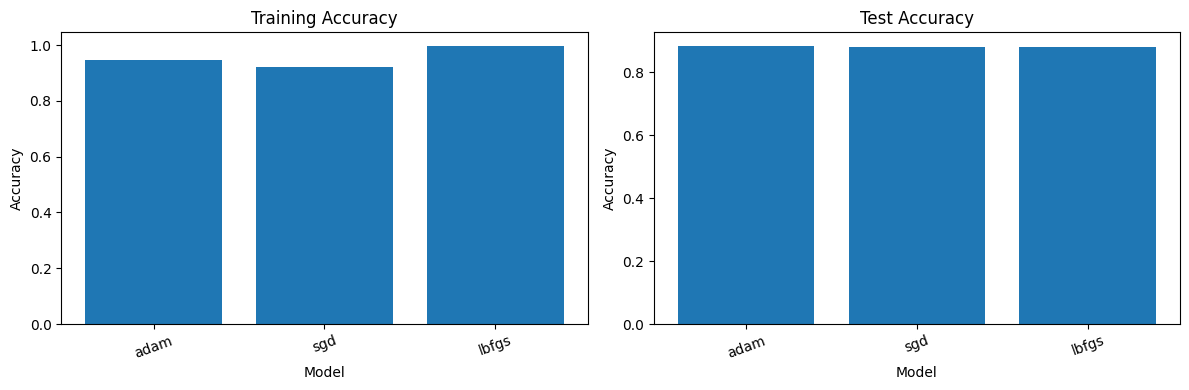

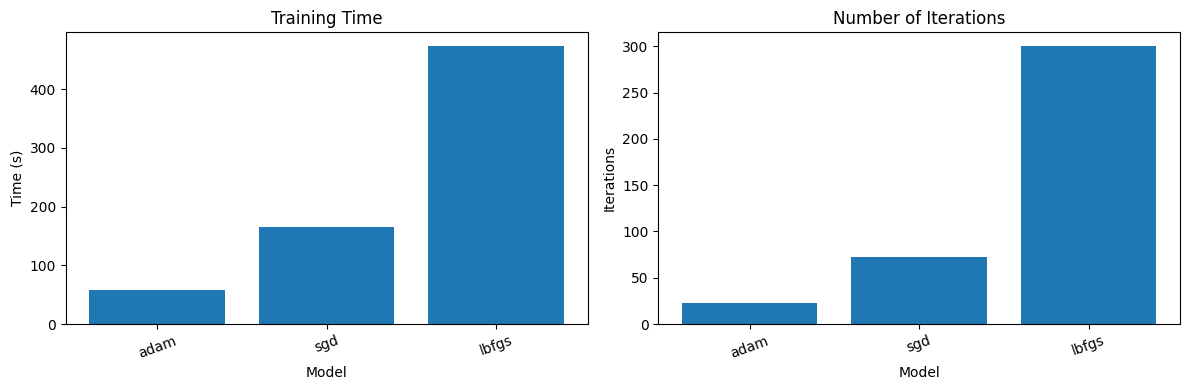

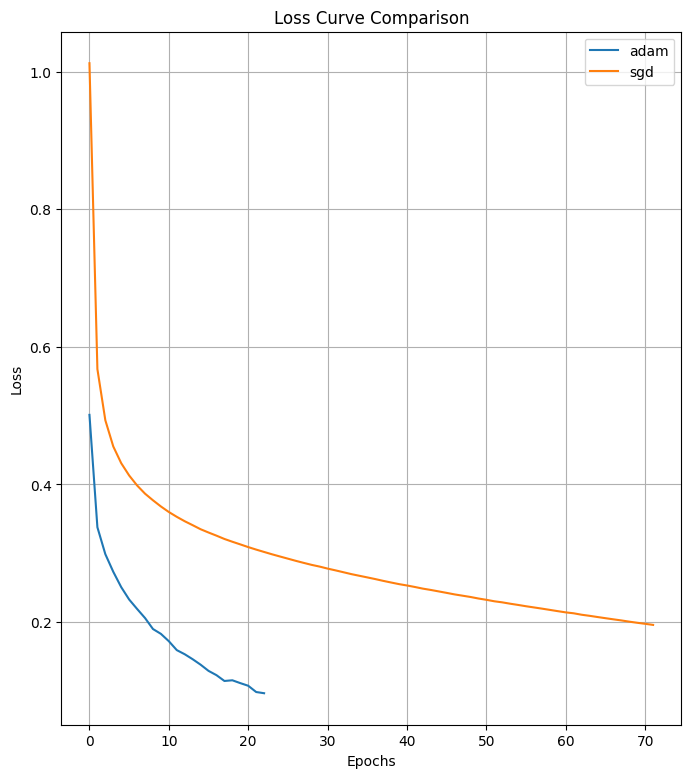

In [32]:
# optimization method
configs_optimization = [
    ("adam", 'adam'),
    ("sgd", 'sgd'),
    ("lbfgs", 'lbfgs'),
]
results = []
loss_curves = {}

for (name,solver) in configs_optimization:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver=solver,
    learning_rate_init=0.001,
    alpha=0.0001,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  if hasattr(mlp, "loss_curve_"):
    loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(8, 9))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


       name  train_acc  test_acc  training time  number of iterations
0  lr=0.001   0.946350    0.8820      57.950682                    23
1   lr=0.01   0.921583    0.8741      68.542893                    28
2    lr=0.1   0.100000    0.1000      50.926400                    20
3      lr=1   0.100000    0.1000      71.409798                    29


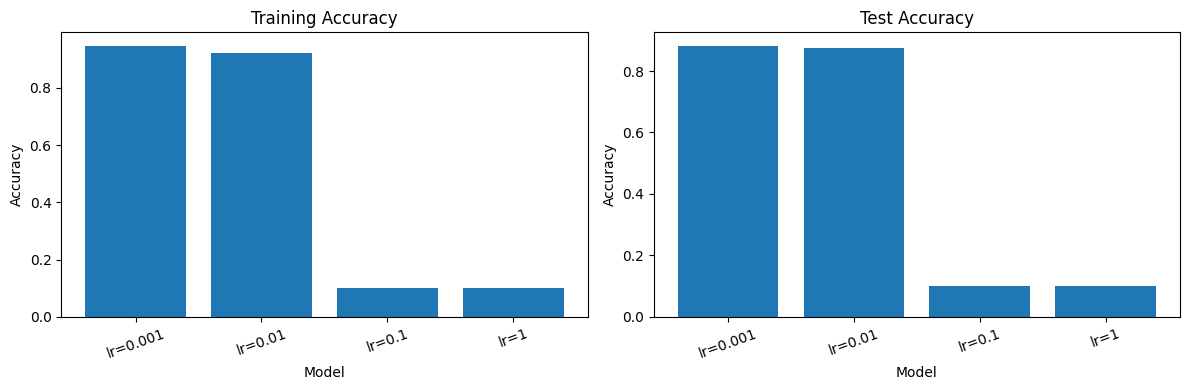

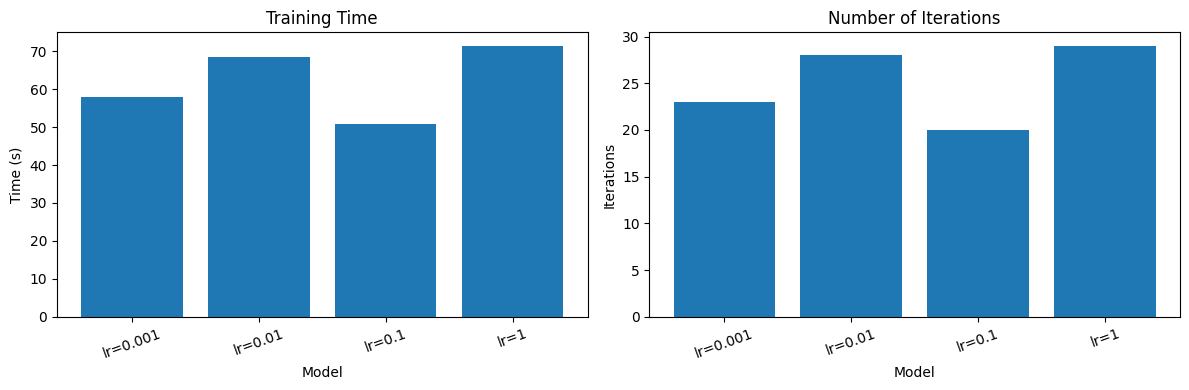

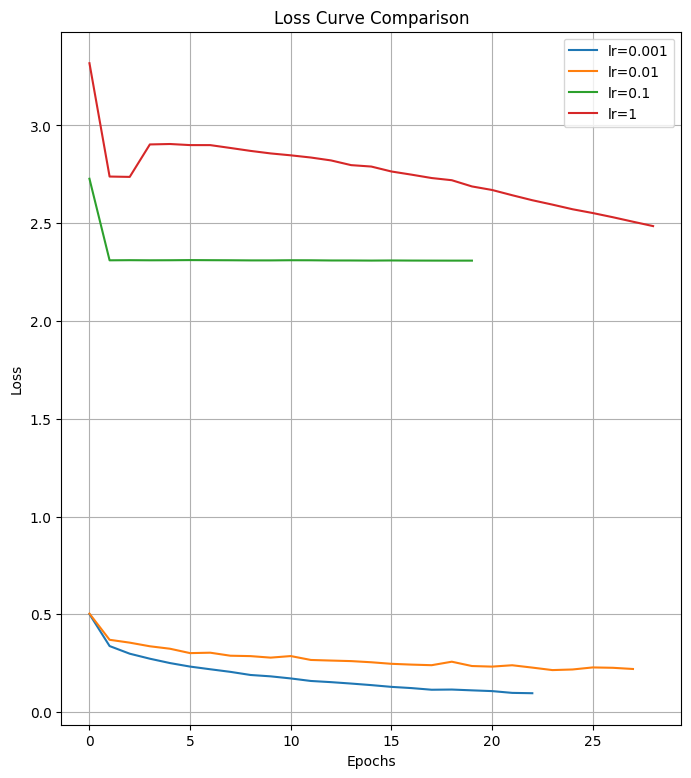

In [28]:
# the learning rate
configs_learning_rate = [
    ("lr=0.001", 0.001),
    ("lr=0.01", 0.01),
    ("lr=0.1", 0.1),
    ("lr=1", 1)
]
results = []
loss_curves = {}

for (name,learning_rate) in configs_learning_rate:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    learning_rate_init=learning_rate,
    alpha=0.0001,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(8, 9))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


                name  train_acc  test_acc  training time  number of iterations
0  no regularization   0.937367    0.8840      52.108940                    21
1       alpha=0.0001   0.946350    0.8820      56.469867                    23
2        alpha=0.001   0.946333    0.8833      58.418742                    23
3         alpha=0.01   0.942750    0.8818      56.195989                    23
4          alpha=0.1   0.937417    0.8827      56.386207                    23


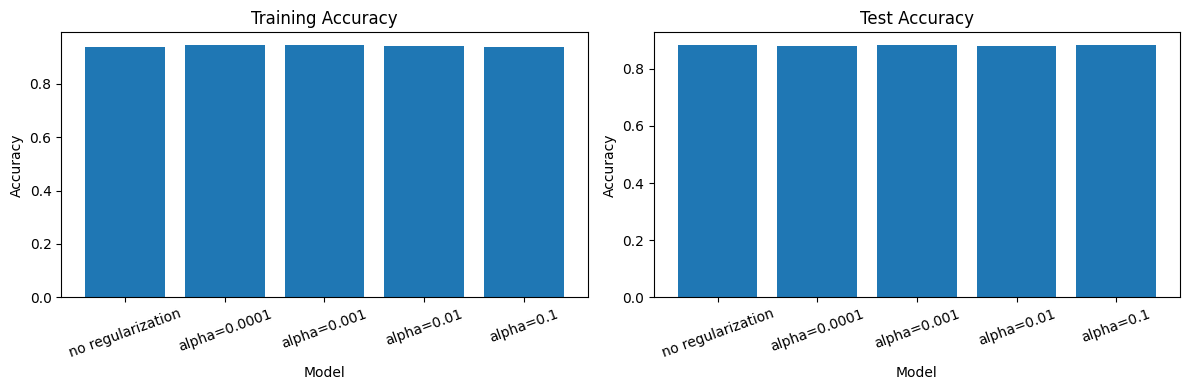

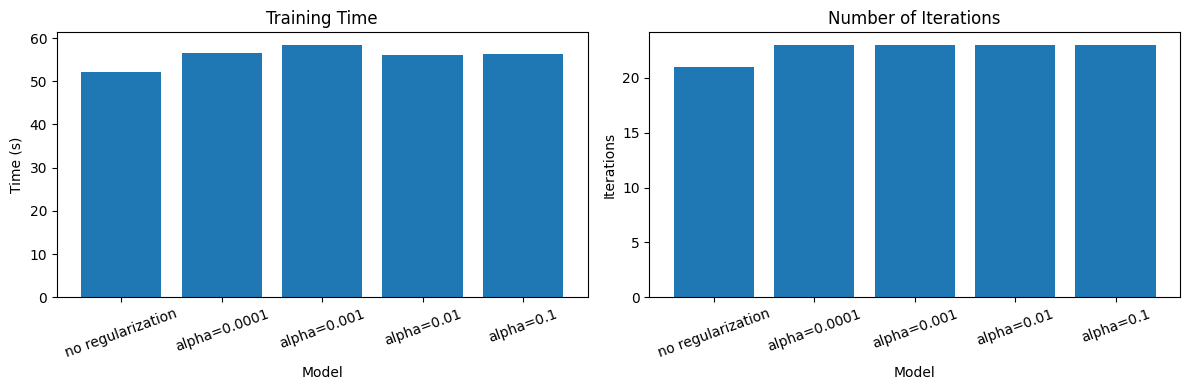

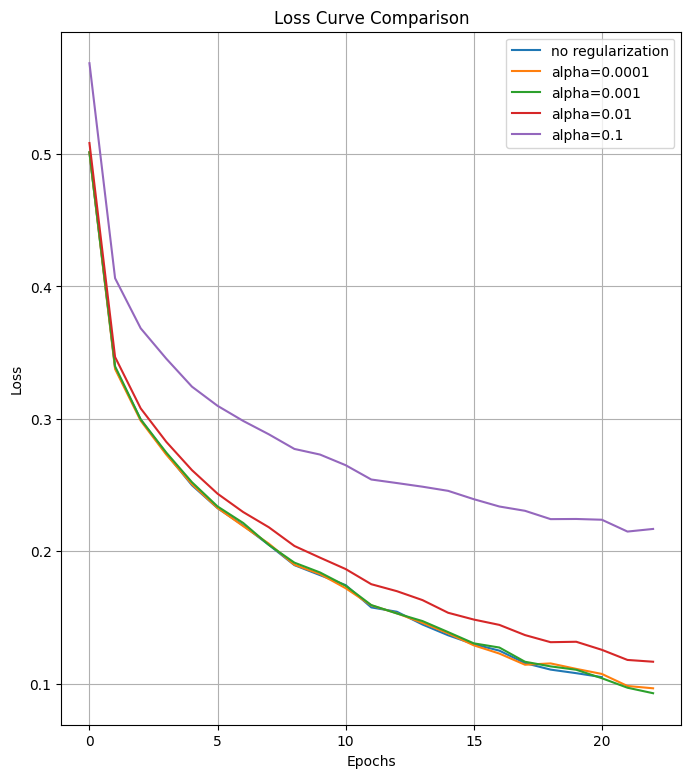

In [29]:
# regularization
configs_regularization = [
    ("no regularization", 0),
    ("alpha=0.0001", 0.0001),
    ("alpha=0.001", 0.001),
    ("alpha=0.01", 0.01),
    ("alpha=0.1", 0.1)
]
results = []
loss_curves = {}

for (name,alpha) in configs_regularization:
  mlp = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=alpha,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=300,
    random_state=1
  )

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(8, 9))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


                      name  train_acc  test_acc  training time  \
0  early stopping disabled   0.996933    0.8787     204.434837   
1       n_iter_no_change=1   0.916300    0.8772      16.372122   
2      n_iter_no_change=10   0.946350    0.8820      55.048488   
3      n_iter_no_change=50   0.946350    0.8820     153.869056   
4     n_iter_no_change=100   0.946350    0.8820     270.036716   

   number of iterations  
0                    80  
1                     7  
2                    23  
3                    63  
4                   113  


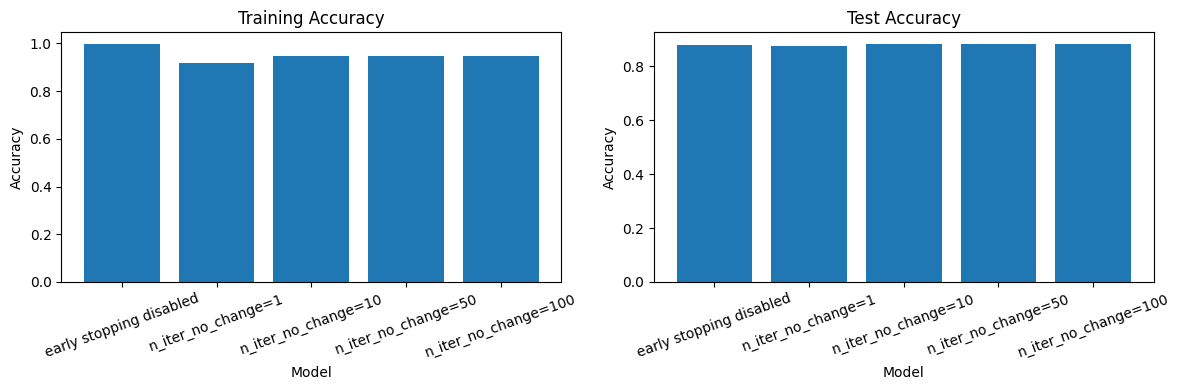

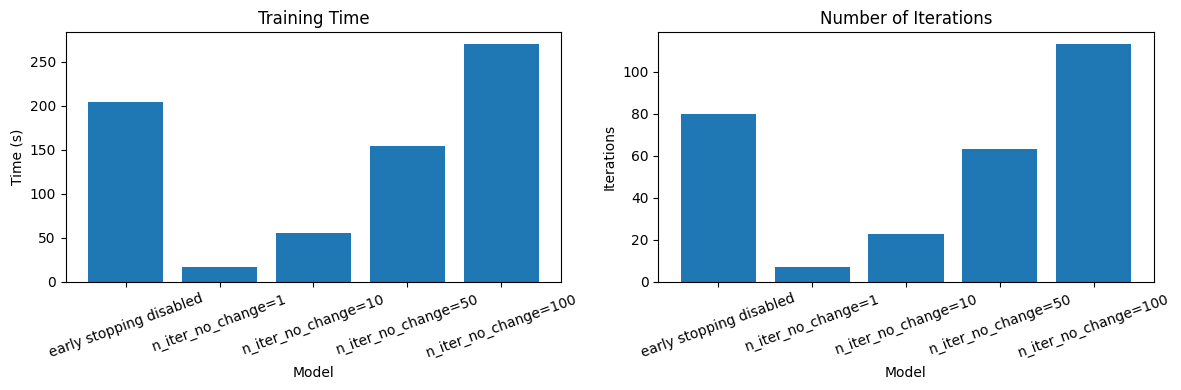

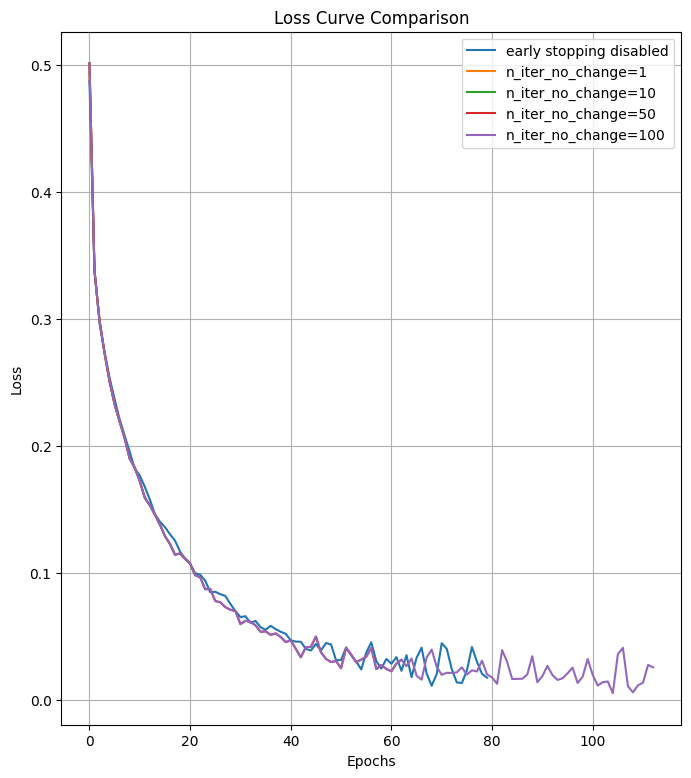

In [12]:
# early stopping settings.
configs_early_stopping = [
    ("early stopping disabled", False, 1),
    ("n_iter_no_change=1", True, 1),
    ("n_iter_no_change=10", True, 10),
    ("n_iter_no_change=50", True, 50),
    ("n_iter_no_change=100", True, 100)
]
results = []
loss_curves = {}

for (name,early_stopping,n_iter_no_change) in configs_early_stopping:
  params = {
      "hidden_layer_sizes": (100, 50),
      "activation": "relu",
      "solver": "adam",
      "learning_rate_init": 0.001,
      "alpha": 0.0001,
      "max_iter": 300,
      "random_state": 1
  }

  if early_stopping:
      params["early_stopping"] = True
      params["n_iter_no_change"] = n_iter_no_change
  else:
      params["early_stopping"] = False

  mlp = MLPClassifier(**params)

  start_time = time.time()
  mlp.fit(X_train,y_train)
  end_time = time.time()

  results.append({
      "name": name,
      "train_acc": mlp.score(X_train,y_train),
      "test_acc": mlp.score(X_test,y_test),
      "training time": end_time - start_time,
      "number of iterations": mlp.n_iter_
  })
  loss_curves[name] = mlp.loss_curve_


df_results = pd.DataFrame(results)
print(df_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["train_acc"] for result in results])
ax[0].set_title("Training Accuracy")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["test_acc"] for result in results])
ax[1].set_title("Test Accuracy")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x_labels = [result["name"] for result in results]
ax[0].bar(x_labels, [result["training time"] for result in results])
ax[0].set_title("Training Time")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis='x', rotation=20)

ax[1].bar(x_labels, [result["number of iterations"] for result in results])
ax[1].set_title("Number of Iterations")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Iterations")
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()
print('\n')

plt.figure(figsize=(8, 9))
for (name, loss_curve) in loss_curves.items():
    plt.plot(loss_curve, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# 3. Fashion-MNIST image classification  using pytorch

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


Total training time: 31.36 seconds
Number of epochs: 17
training accuracy: 0.9345
test accuracy: 0.8882


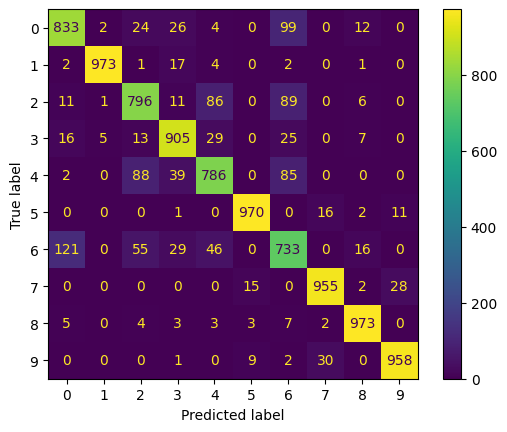

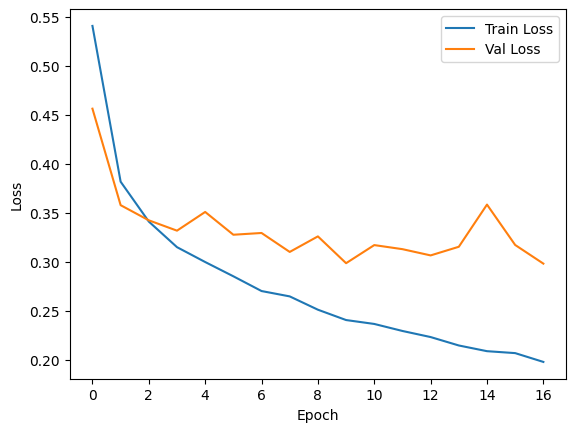

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()

# hyperparameters
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
batch_size = 128
epochs = 300
patience = 10  # early stopping patience
best_val_loss = float('inf')
patience_counter = 0

# detect convergence
tol = 1e-4
no_improve_count = 0
max_no_improve = 10
prev_loss = float('inf')

def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0

    for (X, y) in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()
    return total_loss / len(dataloader)



def evaluate_loop(dataloader, model, loss_fn):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    total_loss /= len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    return total_loss, accuracy

train_losses = []
val_losses = []

start_time = time.time()
for t in range(epochs):
    # print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_loader, model, loss_fn, optimizer)
    val_loss, val_acc = evaluate_loop(val_loader, model, loss_fn)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            # print("Early stopping triggered!")
            break

    # detect convergence
    if abs(prev_loss - val_loss) < tol:
        no_improve_count += 1
        if no_improve_count > max_no_improve:
            break
    else:
        no_improve_count = 0
    prev_loss = val_loss
end_time = time.time()
for i in range(patience_counter):
  train_losses.pop()
  val_losses.pop()


model.load_state_dict(torch.load("best_model.pt"))
train_loss, train_acc = evaluate_loop(train_loader, model, loss_fn)
test_loss, test_acc = evaluate_loop(test_loader, model, loss_fn)

print(f"Total training time: {end_time - start_time:.2f} seconds")
print(f"Number of epochs: {t+1-patience}")
# print(f"training loss: {train_loss:.4f}")
print(f"training accuracy: {train_acc:.4f}")
# print(f"test loss: {test_loss:.4f}")
print(f"test accuracy: {test_acc:.4f}")

#confusion matrix
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        pred = model(X).argmax(1)
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Plot loss curve
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_layers):
        super().__init__()
        layers = []
        input_dim = 28 * 28
        for h in hidden_layers:
            layers.append(nn.Linear(input_dim, h))
            layers.append(nn.ReLU())
            input_dim = h
        layers.append(nn.Linear(input_dim, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0

    for (X, y) in dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()
    return total_loss / len(dataloader)



def evaluate_loop(dataloader, model, loss_fn):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    total_loss /= len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    return total_loss, accuracy

loss_fn = nn.CrossEntropyLoss()

results = []
all_train_losses = []
# all_val_losses = []
configs_hidden_layers = [
    ("(10,)", [10]),
    ("(50,)", [50]),
    ("(100,)", [100]),
    ("(200,)", [200]),
    ("(300,)", [300]),
    ("(400,)", [400]),
    ("(500,)", [500]),
    ("(600,)", [600]),
    ("(700,)", [700]),
    ("(50, 50)", [50, 50]),
    ("(100, 50)", [100, 50]),
    ("(100, 100, 50)", [100, 100, 50]),
    ("(200, 100, 100, 50)", [200, 100, 100, 50]),
    ("(300, 200, 100, 50)", [300, 200, 100, 50]),
    ("(400, 200, 100, 50)", [400, 200, 100, 50]),
    ("(400, 200, 200, 100, 50)", [400, 200, 200, 100, 50]),
    ("(500, 300, 200, 100, 50)", [500, 300, 200, 100, 50]),
    ("(600, 300, 200, 100, 50)", [600, 300, 200, 100, 50]),
]
for name, layer in configs_hidden_layers:
  model = NeuralNetwork(layer).to(device)
  # hyperparameters
  optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
  batch_size = 128
  epochs = 300
  patience = 10  # early stopping patience
  best_val_loss = float('inf')
  patience_counter = 0

  # detect convergence
  tol = 1e-4
  no_improve_count = 0
  max_no_improve = 10
  prev_loss = float('inf')

  train_losses = []
  val_losses = []

  start_time = time.time()
  for t in range(epochs):
      train_loss = train_loop(train_loader, model, loss_fn, optimizer)
      val_loss, val_acc = evaluate_loop(val_loader, model, loss_fn)
      train_losses.append(train_loss)
      val_losses.append(val_loss)

      # Early stopping
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          patience_counter = 0
          torch.save(model.state_dict(), "best_model.pt")
      else:
          patience_counter += 1
          if patience_counter >= patience:
              break

      # detect convergence
      if abs(prev_loss - val_loss) < tol:
          no_improve_count += 1
          if no_improve_count > max_no_improve:
              break
      else:
          no_improve_count = 0
      prev_loss = val_loss
  end_time = time.time()
  for i in range(patience_counter):
    train_losses.pop()
    val_losses.pop()


  model.load_state_dict(torch.load("best_model.pt"))
  train_loss, train_acc = evaluate_loop(train_loader, model, loss_fn)
  test_loss, test_acc = evaluate_loop(test_loader, model, loss_fn)

  results.append({
    "name": name,
    "train_acc": train_acc,
    "test_acc": test_acc,
    "training time": end_time - start_time,
    "Number of epochs": t+1-patience
  })
  all_train_losses.append({
      "name": name,
      "train_losses": train_losses
  })
  # all_val_losses.append(val_losses)

                        name  train_acc  test_acc  training time  \
0                      (10,)    0.86654    0.8418      37.545883   
1                      (50,)    0.91596    0.8771      42.996220   
2                     (100,)    0.93236    0.8853      39.605142   
3                     (200,)    0.93176    0.8865      33.235174   
4                     (300,)    0.93204    0.8885      28.680436   
5                     (400,)    0.92584    0.8879      25.968384   
6                     (500,)    0.94182    0.8862      38.707225   
7                     (600,)    0.93118    0.8895      27.956131   
8                     (700,)    0.93174    0.8853      30.651077   
9                   (50, 50)    0.90594    0.8754      29.578568   
10                 (100, 50)    0.91990    0.8778      30.280307   
11            (100, 100, 50)    0.92170    0.8848      31.447743   
12       (200, 100, 100, 50)    0.90698    0.8756      24.541473   
13       (300, 200, 100, 50)    0.92246    0.884

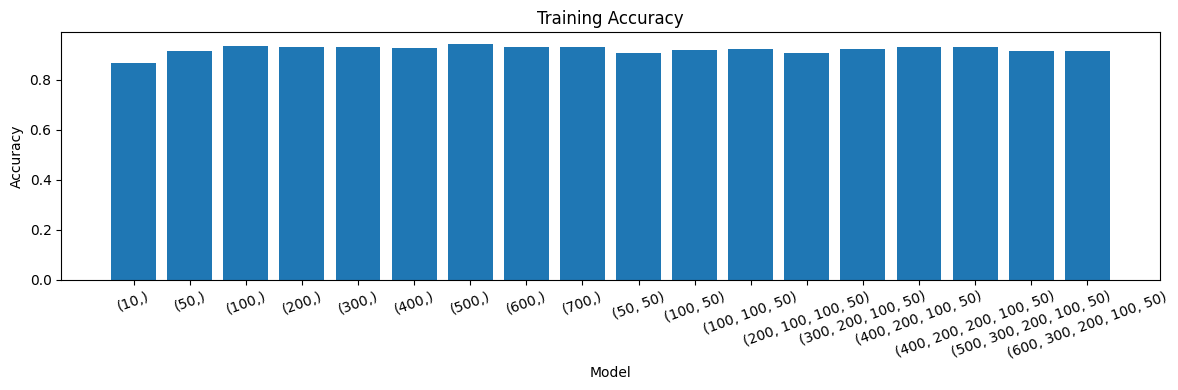

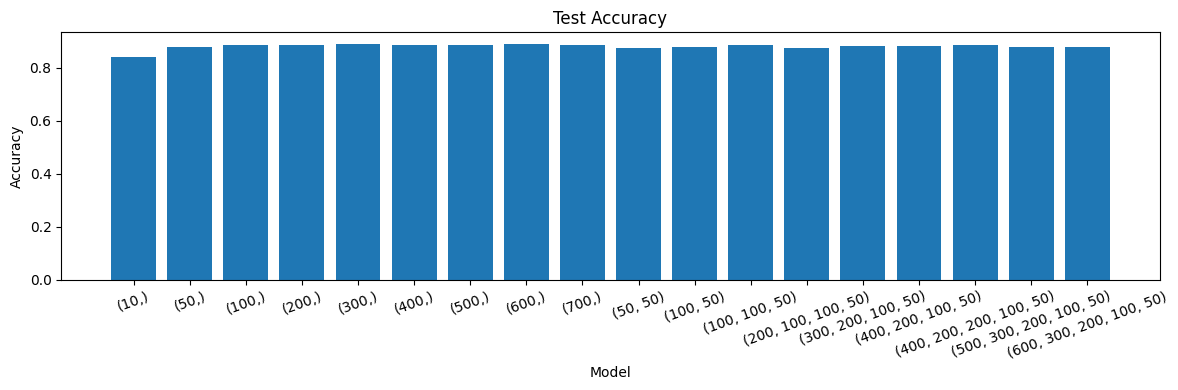

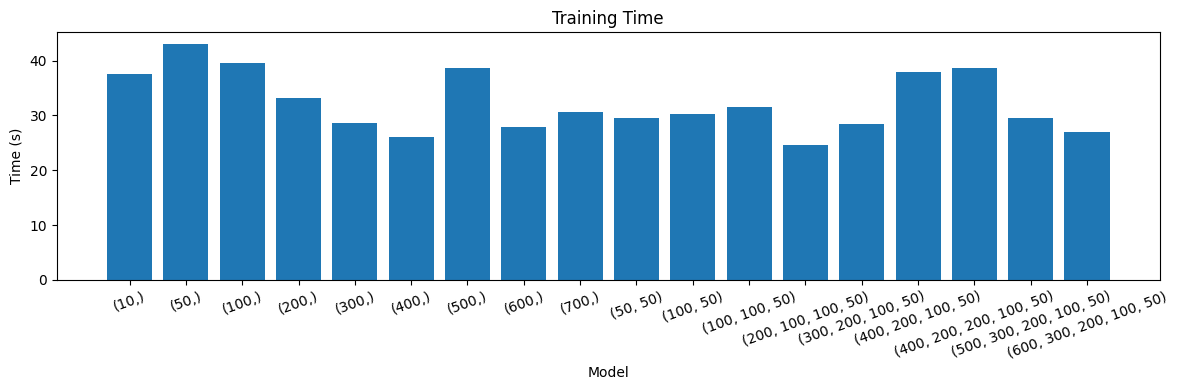

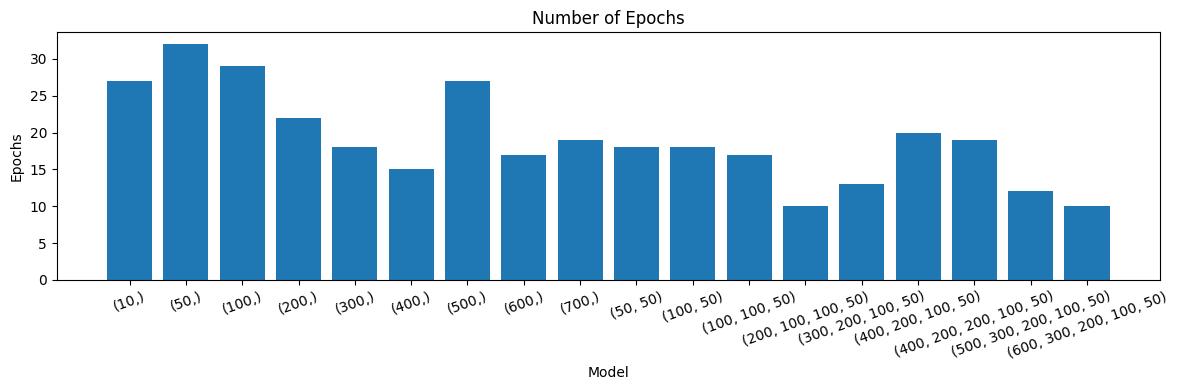

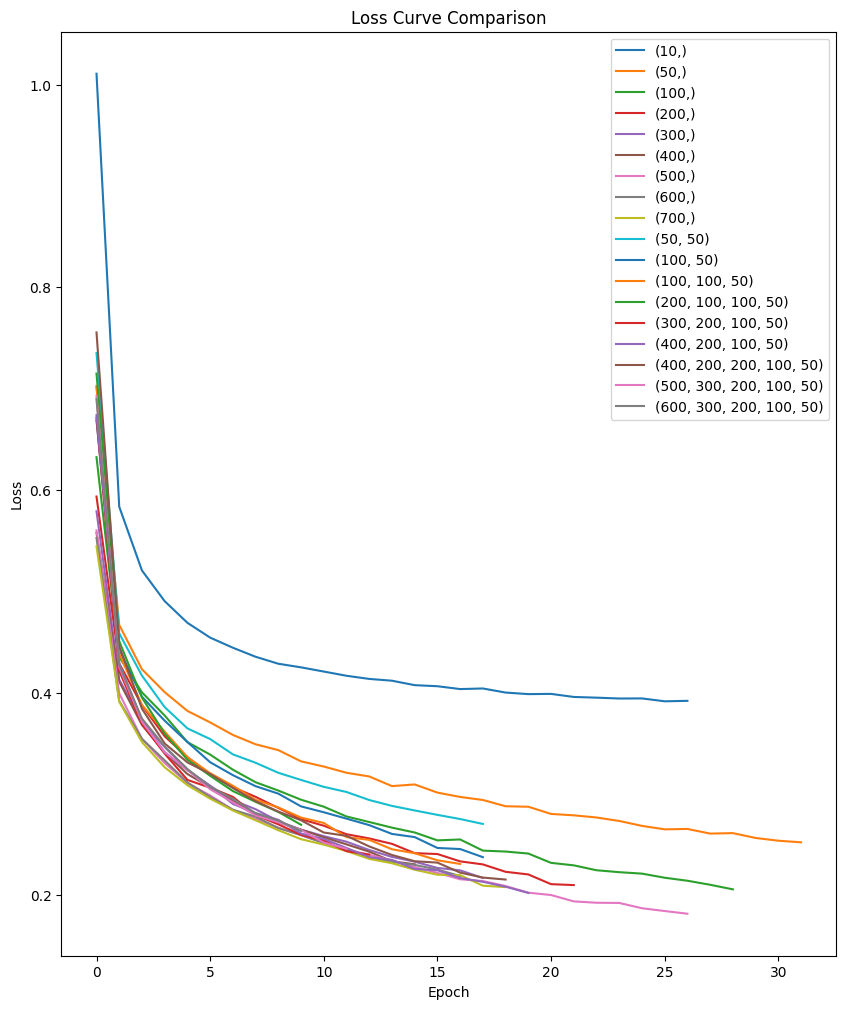

In [19]:
# print results
df_results = pd.DataFrame(results)
print(df_results)

x_labels = [result["name"] for result in results]
fig = plt.figure(figsize=(12, 4))
plt.bar(x_labels, [result["train_acc"] for result in results])
plt.title("Training Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 4))
plt.bar(x_labels, [result["test_acc"] for result in results])
plt.title("Test Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 4))
plt.bar(x_labels, [result["training time"] for result in results])
plt.title("Training Time")
plt.xlabel("Model")
plt.ylabel("Time (s)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 4))
plt.bar(x_labels, [result["Number of epochs"] for result in results])
plt.title("Number of Epochs")
plt.xlabel("Model")
plt.ylabel("Epochs")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

print('\n')

# Plot loss curve

plt.figure(figsize=(10, 12))
for result in all_train_losses:
  name = result["name"]
  train_losses = result["train_losses"]
  plt.plot(train_losses, label=name)
plt.title("Loss Curve Comparison")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()